In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from sklearn.datasets import fetch_olivetti_faces  # 머신러닝 lib
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# pip install pyreadstat

In [34]:
import pandas as pd

df = pd.read_spss('/content/drive/MyDrive/sample_data/한국복지패널2019.sav')
df = df.rename(columns={'h14_g3' : '성별', 'h14_g4': '출생연도', 'h14_g10' :'결혼 유무', 'h14_g11' : '종교' ,'p1402_8aq1' : '급여', 'h14_eco9' :'직업코드', 'h14_reg7': '지역코드'})
df = df.loc[:,['성별', '출생연도', '결혼 유무', '종교', '급여', '직업코드', '지역코드']]
df

,성별,출생연도,결혼 유무,종교,급여,직업코드,지역코드
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


float64
2.0    7913
1.0    6505
Name: 성별, dtype: int64
결측치 :  0        False
1        False
2        False
3        False
4        False
         ...  
14413    False
14414    False
14415    False
14416    False
14417    False
Name: 성별, Length: 14418, dtype: bool
결측치 총합 :  0
0        여자
1        남자
2        남자
3        남자
4        여자
         ..
14413    여자
14414    여자
14415    남자
14416    여자
14417    남자
Name: 성별, Length: 14418, dtype: object


,성별,출생연도,결혼 유무,종교,급여,직업코드,지역코드,나이
0,여자,1945.0,2.0,1.0,NaN,NaN,1.0,75.0
1,남자,1948.0,2.0,2.0,NaN,NaN,1.0,72.0
2,남자,1942.0,3.0,1.0,107.0,762.0,1.0,78.0
3,남자,1962.0,1.0,1.0,192.0,855.0,1.0,58.0
4,여자,1963.0,1.0,1.0,NaN,NaN,1.0,57.0
...,...,...,...,...,...,...,...,...
14413,여자,1967.0,1.0,1.0,NaN,NaN,5.0,53.0
14414,여자,1992.0,5.0,1.0,NaN,NaN,5.0,28.0
14415,남자,1995.0,5.0,1.0,NaN,910.0,5.0,25.0
14416,여자,1998.0,5.0,1.0,200.0,246.0,5.0,22.0


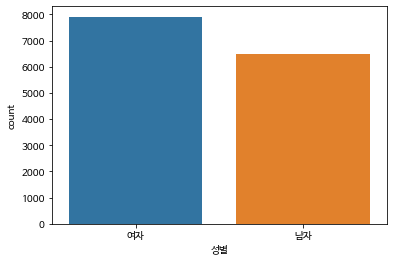

In [35]:
import numpy as np
import seaborn as sns

# 데이터의 타입 확인
print(df['성별'].dtypes)
# 빈도수
print(df['성별'].value_counts())
# 결측치 확인
print('결측치 : ', df['성별'].isna())
print('결측치 총합 : ', df['성별'].isna().sum())

df['성별'] = np.where(df['성별']== 1.0 , '남자','여자')
print(df['성별'])

sns.countplot(data = df, x = '성별')

df['나이'] = (2019.0 - df['출생연도']) + 1
df

In [36]:
# df['직업코드']
# df['직업코드'].value_counts()
list_job = pd.read_excel('/content/drive/MyDrive/sample_data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')

# inplace = True 바뀐 컬럼을 바로 적용시킨다
list_job.rename(columns={'code_job':'직업코드','job':'직업'},inplace=True)

df = df.merge(list_job, how = 'left', on = '직업코드')
df

,성별,출생연도,결혼 유무,종교,급여,직업코드,지역코드,나이,직업
0,여자,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,NaN
1,남자,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,NaN
2,남자,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,전기공
3,남자,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,금속기계 부품 조립원
4,여자,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,NaN
...,...,...,...,...,...,...,...,...,...
14413,여자,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,NaN
14414,여자,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,NaN
14415,남자,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,건설 및 광업 단순 종사자
14416,여자,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,보건 의료 관련 종사자


In [37]:
job_income = df.dropna(subset=['직업','급여']).groupby('직업', as_index=False).agg(mean_income=('급여','mean'))
job_income

,직업,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [40]:
# 급여가 가장 많은 직업
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,직업,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


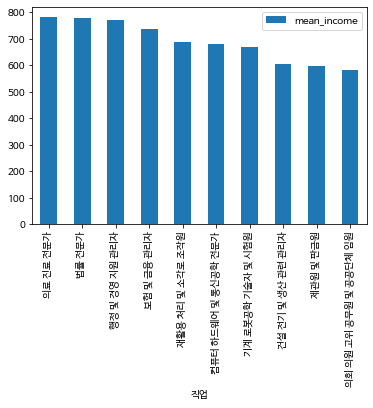

In [43]:
top10.plot.bar(x='직업',y='mean_income')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


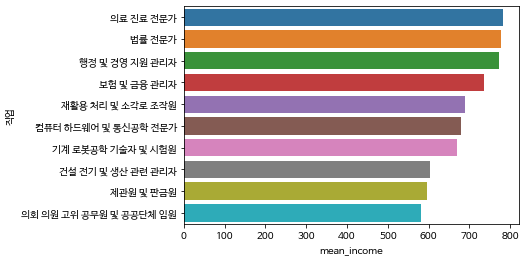

In [45]:
sns.barplot(data = top10, x = 'mean_income',y = '직업')

In [47]:
# 급여가 작은 직업
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,직업,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


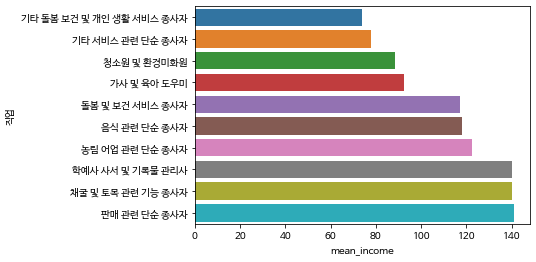

In [48]:
sns.barplot(data = bottom10, x = 'mean_income',y = '직업')

In [49]:
# 성별과 직업간의 관계
job_male = df.dropna(subset=['직업']).query('성별=="남자"').groupby('직업', as_index = False).agg(종사자수=('직업','count')).sort_values('종사자수',ascending= False).head(10)
# query() 비교 논리 연산자를 통해 뽑아냄
job_male

,직업,종사자수
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


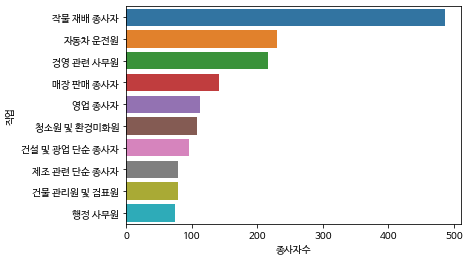

In [52]:
sns.barplot(data =job_male, x = '종사자수',y = '직업' )

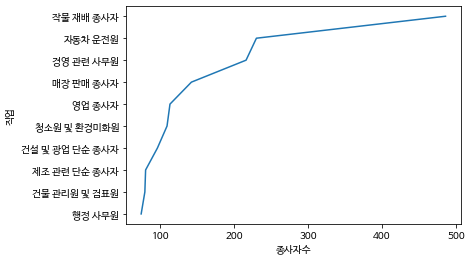

In [61]:
sns.lineplot(x="종사자수", y="직업", data=job_male) 

In [53]:
job_female = df.dropna(subset=['직업']).query('성별=="여자"').groupby('직업', as_index = False).agg(종사자수=('직업','count')).sort_values('종사자수',ascending= False).head(10)
job_female

,직업,종사자수
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


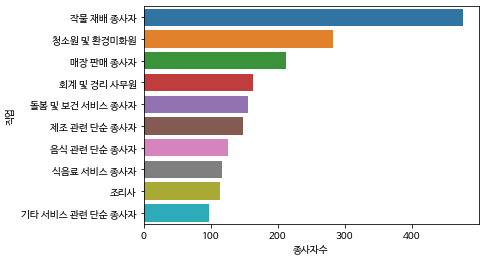

In [54]:
sns.barplot(data =job_female, x = '종사자수',y = '직업' )

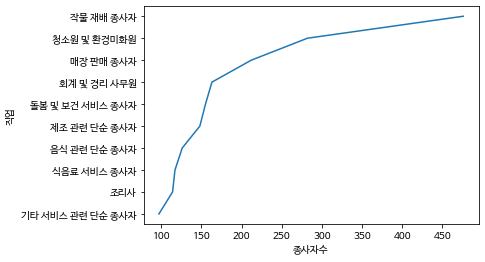

In [60]:
sns.lineplot(x="종사자수", y="직업", data=job_female) 

In [55]:
job_female_total = df.dropna(subset=['직업']).query('성별=="여자"').groupby('직업', as_index = False).agg(종사자수=('직업','count')).sort_values('종사자수',ascending= False)
job_female_total

,직업,종사자수
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
...,...,...
86,정보 시스템 및 웹 운영자,1
25,기타 식품가공 관련 기계 조작원,1
84,전기∙전자 부품 및 제품 제조 장치 조작원,1
5,건설관련기능종사자,1
